# YSA Dersi

Bu uygulamaya gecmeden once asagidaki dersleri tekrar etmek isteyebilirsiniz.
 - [Yapay Sinir Hucresi](http://nbviewer.jupyter.org/github/uzay00/KaVe/blob/master/Ders4/Yapay%20Sinir%20Hücresi.ipynb) 
 - [Yapay Sinir Aglari](http://nbviewer.jupyter.org/github/uzay00/KaVe/blob/master/Ders4/Yapay%20Sinir%20Ağları.ipynb) 
 

# Görüntülerde duygu tanıma
Burada öğrendiklerimizi ve yazdfığımız YSA kodunu şu veri seti üzerinde deneyebilirsiniz.

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import timeit
import random

class yapay_sinir_agi():
    def __init__(self, katmanlar):
        self.katmanlar = katmanlar
        self.b = [np.random.randn(k, 1) for k in self.katmanlar[1:]] # bias degerleri (ilk katman haric)
        self.W = [np.random.randn(k2, k1) for k1, k2 in zip(self.katmanlar[:-1],self.katmanlar[1:])]
        self.H = [] # hata
        
        self.onlyOnce = True

    def ag(self):
        return self.W, self.b
    
    def ileribesleme(self, a):
        """Katman katman yeni a degerleri hesaplaniyor"""
        a = self.checkDimension(a)
        for w, b in zip(self.W, self.b):
            z = np.dot(w, a)+b
            a = self.sigmoid(z)
        return a
    
    def geribesleme(self,X,y):
        delta_b = [np.zeros(b.shape) for b in self.b]
        delta_w = [np.zeros(w.shape) for w in self.W]
        a = X; A, Z = [a], []  # A, Z degerleri
        for w, b in zip(self.W, self.b):# z ve a degerlerini depolayalim
            z = np.dot(w, a) + b
            a = self.sigmoid(z)
            Z.append(z); A.append(a)
            
            #self.printShape(b, "b", w, "w")


        
        hata = A[-1] - y # En son katmandaki hata 
        delta = hata * self.sigmoid_turevi(Z[-1])
        delta_b[-1] = delta # Son katmanda W, b'deki degisim  
        delta_w[-1] = delta * A[-2].T # ERROR: np.dot(delta, A[-2].T)
        
        #self.printShape(delta_b[-1], "delta_b[-1]", delta_w[-1], "delta_w[-1]")
        
        for k in range(2, len(self.katmanlar)): # Hatanin geriye yayilimi
            delta = np.dot(self.W[-k+1].T, delta) * self.sigmoid_turevi(Z[-k])
            delta_b[-k] = delta
            delta_w[-k] = delta * A[-k-1].T # ERROR: np.dot(delta, A[-k-1].T)
            
            #self.printShape(delta_b[-k], "delta_b[-k]", delta_w[-k], "delta_w[-k]")
        self.onlyOnce = False

        return (delta_b, delta_w)  
    
    def hata(self,X,y):
        a = self.ileribesleme(X)
        if a.shape != y.shape: print(hata)
        return np.sum(np.power(a-y,2))
    
    
    def gradyan_inis(self, X_train, y_train, alpha, number_steps):
        print("X_train.shape",X_train.shape)
        print("y_train.shape",y_train.shape)
        for s in range(number_steps):
            i, m = 0,X_train.shape[1]
            X, y = X_train[:,[i]], y_train[:,[i]]
            tum_delta_b, tum_delta_w = self.geribesleme(X,y)
            hata = self.hata(X,y)
            
            for i in range(1,m): # Tum X kolonlari icin
                X, y = X_train[:,[i]], y_train[:,[i]]
                delta_b, delta_w = self.geribesleme(X,y)
                tum_delta_b = [tdb + db for tdb, db in zip(tum_delta_b, delta_b)]
                tum_delta_w = [tdw + dw for tdw, dw in zip(tum_delta_w, delta_w)]
                hata += self.hata(X,y)
                    
            tum_delta_b = [alpha*tdb for tdb in tum_delta_b]
            tum_delta_w = [alpha*tdw for tdw in tum_delta_w]
        
            self.W = [w - dw for w, dw in zip(self.W, tum_delta_w)]
            self.b = [b - db for b, db in zip(self.b, tum_delta_b)]
            self.H.append(hata/m)
            
            if s % (number_steps/10) == 0:
                print(" Error at iteration ",s,"/",number_steps," is ", self.H[-1])

    def fit(self, X_train, y_train, alpha = 0.0000001, number_steps = 1000):  
        X_train = X_train.T # X verileri kolon=gozlem, satir=oznitelik (alistigimizin tersi)
        y_train = self.checkOutputLayer(y_train)
        return self.gradyan_inis(X_train, y_train, alpha, number_steps)
    
    def predict(self, X_test):
        if self.katmanlar[-1] == 1 : 
            tahmin = self.ileribesleme(X_test.T) >= 0.5  
            t = tahmin.astype('int')
            return t[0]
        return np.argmax(self.ileribesleme(X_test.T), axis= 0)
    
    #### Yardimci Fonksiyonlar
    def sigmoid(self,z):
        return 1.0/(1.0+np.exp(-z))
    def sigmoid_turevi(self,z):
        return self.sigmoid(z)*(1-self.sigmoid(z))
    def checkDimension(self,x):
        if x.ndim == 1: return x.reshape(x.shape[0], 1)
        return x
    def checkOutputLayer(self, y):
        if len(set(y)) == 2: return y.reshape(1,y.shape[0])
        y_vec = np.zeros((len(set(y)),len(y)))
        for c,r in enumerate(y):  y_vec[r,c] = 1
        return y_vec
    def printShape(self, b, bs, w, ws):
        if self.onlyOnce == True: print(bs, ".shape: ",b.shape," ", ws ,".shape: ",w.shape)

# Veriyi oku ve ciz 

In [2]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
def getData():
    Y = []
    X = []
    first = True
    for line in open('fer2013/fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            y = int(row[0])
            Y.append(y)
            X.append([int(p) for p in row[1].split()])
    return np.array(X) / 255.0, np.array(Y)

In [3]:
X, y = getData()

In [4]:
def random_image_draw(X = X *255.0, y=y):
    j = np.random.choice(len(y))
    plt.imshow(X[j].reshape(48, 48), cmap='gray')
    plt.title(label_map[y[j]])

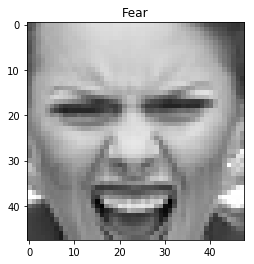

In [5]:
random_image_draw()

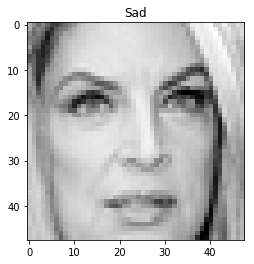

In [6]:
random_image_draw()

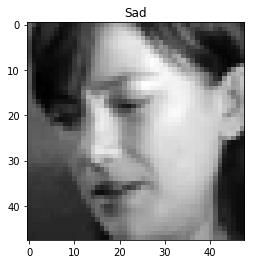

In [7]:
random_image_draw()

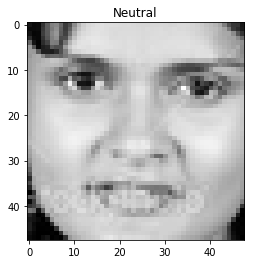

In [8]:
random_image_draw()

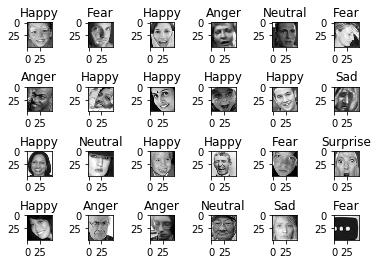

In [9]:
fig = plt.figure()
fig.subplots_adjust(hspace=1.6, wspace=1.2)
for i in range(1,25):
    ax = fig.add_subplot(4, 6, i)
    random_image_draw()

In [10]:
#################################################
# Datayi train ve test olark ayir
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("ogrenme kumesinin uzunlugu: ", len(X_train))
print("test kumesinin uzunlugu: ", len(X_test))

#################################################
# Datayi normalize et 
#.      Standardize features by removing the mean and scaling to unit variance
#.      Centering and scaling happen independently on each feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ogrenme kumesinin uzunlugu:  26915
test kumesinin uzunlugu:  8972


In [11]:
# Fitting Our Own Neural Network to the Training set
start_time = timeit.default_timer()
ysa = yapay_sinir_agi(katmanlar = [48*48,96,24,7])
ysa.fit(X_train_scaled,y_train, alpha = 0.0001, number_steps = 10)

tahmin = ysa.predict(X_test_scaled)
print("Time: ", timeit.default_timer() - start_time)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, tahmin)
print("\t\t\t\t\t---Our Own Neural Network---")
print("confusion_matrix:\n", cm)
print("accuracy_score: ", accuracy_score(y_test, tahmin))
plt.plot(ysa.H)

X_train.shape (2304, 26915)
y_train.shape (7, 26915)
 Error at iteration  0 / 10  is  2.3483716944058273
 Error at iteration  1 / 10  is  1.6326833172265014


KeyboardInterrupt: 

In [ ]:
# Fitting Our Own Neural Network to the Training set
start_time = timeit.default_timer()
ysa = yapay_sinir_agi(katmanlar = [48*48,12,7])
ysa.fit(X_train_scaled,y_train, alpha = 0.00001, number_steps = 100)

tahmin = ysa.predict(X_test_scaled)
print("Time: ", timeit.default_timer() - start_time)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, tahmin)
print("\t\t\t\t\t---Our Own Neural Network---")
print("confusion_matrix:\n", cm)
print("accuracy_score: ", accuracy_score(y_test, tahmin))
plt.plot(ysa.H)

X_train.shape (2304, 26915)
y_train.shape (7, 26915)
 Error at iteration  0 / 2  is  2.6206950181258852
Time:  10.87051049200818
					---Our Own Neural Network---
confusion_matrix:
 [[   8    0    0  658  593   14    1]
 [   0    0    0   64   77    2    0]
 [   9    0    0  619  634   10    1]
 [  13    0    0 1335  888   25    0]
 [   6    1    2  828  656   28    2]
 [   7    0    0  402  555    2    0]
 [   9    0    2  892  606   23    0]]
accuracy_score:  0.22302719572001783


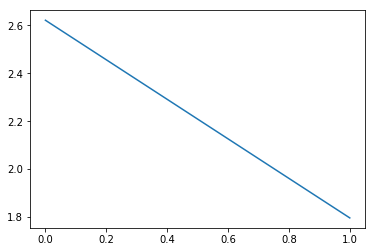

In [37]:
# Fitting Our Own Neural Network to the Training set
start_time = timeit.default_timer()
ysa = yapay_sinir_agi(katmanlar = [48*48,24,12,7])
ysa.fit(X_train_scaled,y_train, alpha = 0.0001, number_steps = 2)

tahmin = ysa.predict(X_test_scaled)
print("Time: ", timeit.default_timer() - start_time)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, tahmin)
print("\t\t\t\t\t---Our Own Neural Network---")
print("confusion_matrix:\n", cm)
print("accuracy_score: ", accuracy_score(y_test, tahmin))
plt.plot(ysa.H)

In [12]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


model2 = Sequential()
model2.add(Dense(400, input_dim=48*48, activation='relu')) 
model2.add(Dense(96, activation='relu'))
model2.add(Dense(48, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(7, activation='softmax'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()


Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               922000    
_________________________________________________________________
dense_2 (Dense)              (None, 96)                38496     
_________________________________________________________________
dense_3 (Dense)              (None, 48)                4656      
_________________________________________________________________
dense_4 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 175       
Total params: 966,503
Trainable params: 966,503
Non-trainable params: 0
_________________________________________________________________


In [13]:
y_train_labels = keras.utils.to_categorical(y_train)
y_test_labels = keras.utils.to_categorical(y_test)

In [14]:
# Fitting the ANN to the Training set
model2.fit(X_train_scaled, y_train_labels, batch_size = 10, epochs = 100)

Epoch 1/100
26915/26915 [==============================] - 31s 1ms/step - loss: 0.3756 - acc: 0.8593
Epoch 2/100
26915/26915 [==============================] - 37s 1ms/step - loss: 0.3557 - acc: 0.8646
Epoch 3/100
26915/26915 [==============================] - 34s 1ms/step - loss: 0.3463 - acc: 0.8674
Epoch 4/100
26915/26915 [==============================] - 33s 1ms/step - loss: 0.3382 - acc: 0.8696
Epoch 5/100
26915/26915 [==============================] - 28s 1ms/step - loss: 0.3292 - acc: 0.8727
Epoch 6/100
26915/26915 [==============================] - 28s 1ms/step - loss: 0.3225 - acc: 0.8746
Epoch 7/100
26915/26915 [==============================] - 34s 1ms/step - loss: 0.3148 - acc: 0.8772
Epoch 8/100
26915/26915 [==============================] - 33s 1ms/step - loss: 0.3071 - acc: 0.8798
Epoch 9/100
26915/26915 [==============================] - 33s 1ms/step - loss: 0.3007 - acc: 0.8818
Epoch 10/100
26915/26915 [==============================] - 33s 1ms/step - loss: 0.2934 - a

26915/26915 [==============================] - 34s 1ms/step - loss: 0.1155 - acc: 0.9570
Epoch 82/100
26915/26915 [==============================] - 34s 1ms/step - loss: 0.1179 - acc: 0.9561
Epoch 83/100
26915/26915 [==============================] - 35s 1ms/step - loss: 0.1116 - acc: 0.9583
Epoch 84/100
26915/26915 [==============================] - 32s 1ms/step - loss: 0.1127 - acc: 0.9582
Epoch 85/100
26915/26915 [==============================] - 32s 1ms/step - loss: 0.1103 - acc: 0.9589
Epoch 86/100
26915/26915 [==============================] - 33s 1ms/step - loss: 0.1126 - acc: 0.9580
Epoch 87/100
26915/26915 [==============================] - 30s 1ms/step - loss: 0.1105 - acc: 0.9587
Epoch 88/100
26915/26915 [==============================] - 26s 962us/step - loss: 0.1080 - acc: 0.9596
Epoch 89/100
26915/26915 [==============================] - 30s 1ms/step - loss: 0.1099 - acc: 0.9590
Epoch 90/100
26915/26915 [==============================] - 34s 1ms/step - loss: 0.1087 - acc

In [15]:
y_pred = model2.predict(X_test_scaled)
y_pred = y_pred.argmax(axis=1)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("\t\t\t\t\t---Keras Neural Network---")
print("confusion_matrix:\n", cm)
print("accuracy_score: ", accuracy_score(y_test, y_pred))

					---Keras Neural Network---
confusion_matrix:
 [[ 309   21  220  150  269   60  254]
 [  29   45   22    9   22    6   18]
 [ 111   30  413  121  250  134  217]
 [ 153   30  141 1188  267   70  337]
 [ 150   34  212  142  565   71  338]
 [  32    8  115   70   88  590  113]
 [ 119   17  168  183  354   52  655]]
accuracy_score:  0.41963887650468124
